<a href="https://colab.research.google.com/github/mvslopes/PYTHON-ESTUDOS/blob/main/PRODUTIVIDADE_CD23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE DESCRITIVA**
* **Dados da Produtividade das Linhas de Separação**
* **Centro de Distribuição de produtos de cabelos e pele**

##**01-Objetivo**

##**02-Instalando e Carregando Pacotes**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

##**03-Carregando e compreendendo os dados**

In [7]:
dfprod = pd.read_csv("/home/PRODUTIVIDADE_CD23.csv",encoding = "ISO-8859-1")
# 01- código para carregar o dataset de produtividade das linhas de separação do centro de Distrbuição.

In [8]:
dfprod.shape
# 02- código para mostrar a quantidade de linhas e colunas do dataframe.
# Temos 21.840 linhas e 07 colunas.

(21840, 7)

In [9]:
dfprod.isna().sum()
# 03- código para contar o número de valores nulos (NaN) em cada coluna do dataFrame.
# Não temos nenhum valor nulo.

data_sep         0
mes              0
hora_sep         0
turno_sep        0
linha_sep        0
categoria        0
produtividade    0
dtype: int64

In [12]:
dfprod.head()
# 04- código para verificar as primeiras 05 linhas do dataframe.

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
0,02/01/2023,jan,06:00-07:00,primeiro_turno,linha_01,shampoos,1249
1,02/01/2023,jan,07:00-08:00,primeiro_turno,linha_01,shampoos,2849
2,02/01/2023,jan,08:00-09:00,primeiro_turno,linha_01,shampoos,823
3,02/01/2023,jan,09:00-10:00,primeiro_turno,linha_01,shampoos,2478
4,02/01/2023,jan,10:00-11:00,primeiro_turno,linha_01,shampoos,1030


In [13]:
dfprod.tail()
# 05- código para verificar as 05 últimas linhas do dataframe.

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar,1625
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar,1033
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar,1826
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar,796
21839,31/10/2023,out,21:00-22:00,segundo_turno,linha_06,protetor_solar,957


In [14]:
dfprod.info()
# 06- código para fornecer informações concisas sobre um dataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21840 entries, 0 to 21839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_sep       21840 non-null  object
 1   mes            21840 non-null  object
 2   hora_sep       21840 non-null  object
 3   turno_sep      21840 non-null  object
 4   linha_sep      21840 non-null  object
 5   categoria      21840 non-null  object
 6   produtividade  21840 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [15]:
dfprod.select_dtypes(include='int64')

# 06- Código para selecionar todas as colunas do DataFrame que possuem o tipo de dados int64 (inteiros).
# Temos no dataframe 21.840 linhas e 1 coluna com tipo de dados int64 (inteiros.

,produtividade
0,1249
1,2849
2,823
3,2478
4,1030
...,...
21835,1625
21836,1033
21837,1826
21838,796


In [16]:
dfprod.select_dtypes(include='object')
# 07- Código para selecionar todas as colunas do DataFrame que possuem o tipo de dados object (texto).
# Temos no dataframe 21,840 linhas e 06 colunas com tipo de dados object (texto).

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria
0,02/01/2023,jan,06:00-07:00,primeiro_turno,linha_01,shampoos
1,02/01/2023,jan,07:00-08:00,primeiro_turno,linha_01,shampoos
2,02/01/2023,jan,08:00-09:00,primeiro_turno,linha_01,shampoos
3,02/01/2023,jan,09:00-10:00,primeiro_turno,linha_01,shampoos
4,02/01/2023,jan,10:00-11:00,primeiro_turno,linha_01,shampoos
...,...,...,...,...,...,...
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar


In [17]:
dfprod.describe()
# 08- código para gerar as estatísticas descritivas para as colunas numéricas int64 (inteiros) do dataFrame.
# Temos count =  quantidade de linhas,
# mean =  Média da separação de peças/h.
# min = Indica o valor minimo que foi alcabçado na separação de peças/h.
# std =  Desvio padrão separação de peças/h
# Primeiro quartil =  25 %  da separação de peças/h estão abaixo desse valor.
# Segundo Quartil = Mediana = 50%  da separação de peças/h estão abaixo desse valor.
# Terceiro Quartil = 75% da separação de peças/h estã abaixo dessa valor.
# Valor máximo = Indica o valor máximo que foi alcabçado na separação de peças/h.

,produtividade
count,21840.000000
mean,1595.212225
std,608.726098
min,600.000000
25%,1110.750000
50%,1401.000000
75%,2051.000000
max,3000.000000


In [18]:
dfprod.duplicated().sum()
# 10- Código retornar o número total de linhas duplicadas no dataFrame.
# Não temos no dataframe nenhuma linha duplicada

0

##**04-Respondendo as perguntas de negócios**

###**01-Qual é a distribuição da separação de peças/h do centro de distrbuição?**

####**Cálculo do Histograma**

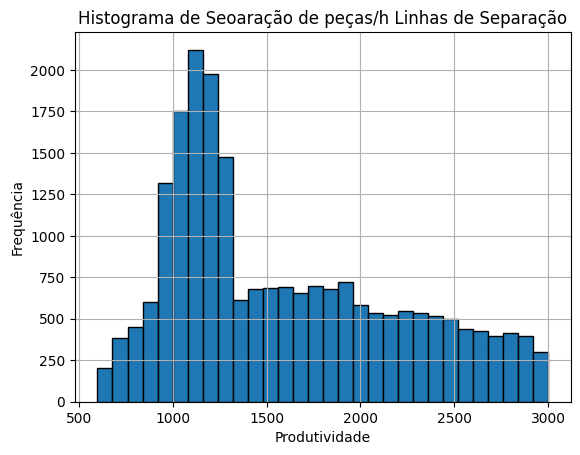

In [19]:
# @title
# A- Cálculo do Histograma
dfprod["produtividade"].hist(bins=30, edgecolor='black')
plt.title('Histograma de Seoaração de peças/h Linhas de Separação')
plt.xlabel('Produtividade')
plt.ylabel('Frequência')
plt.show()